## Time series forecasting fundamentals with tensorflow

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## importing time series with pandas

In [1]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many sample
len(df)

2787

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin')

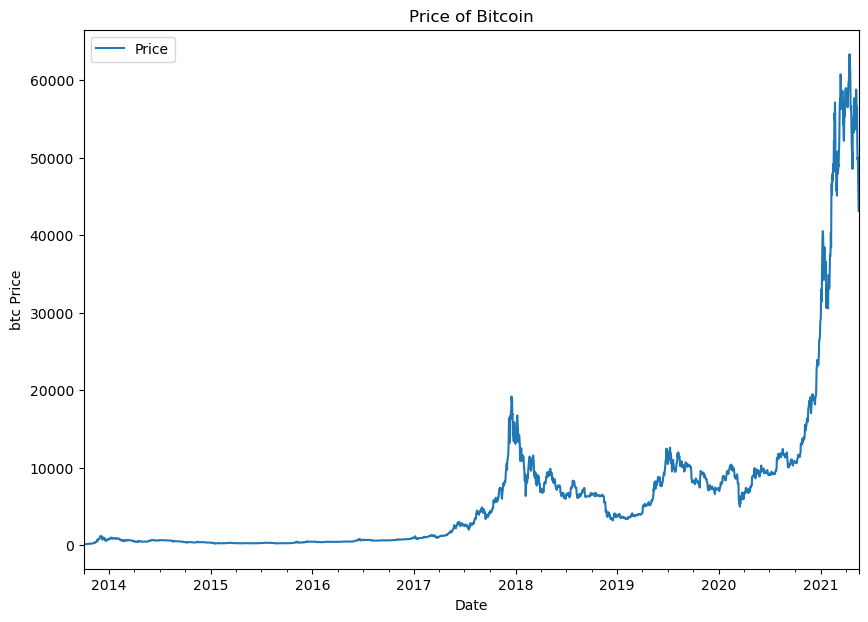

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("btc Price")
plt.title("Price of Bitcoin")

## Importing time series data with python's csv module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
      timesteps.append(datetime.strptime(row[1], "%Y-%m-%d"))
      btc_price.append(float(row[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

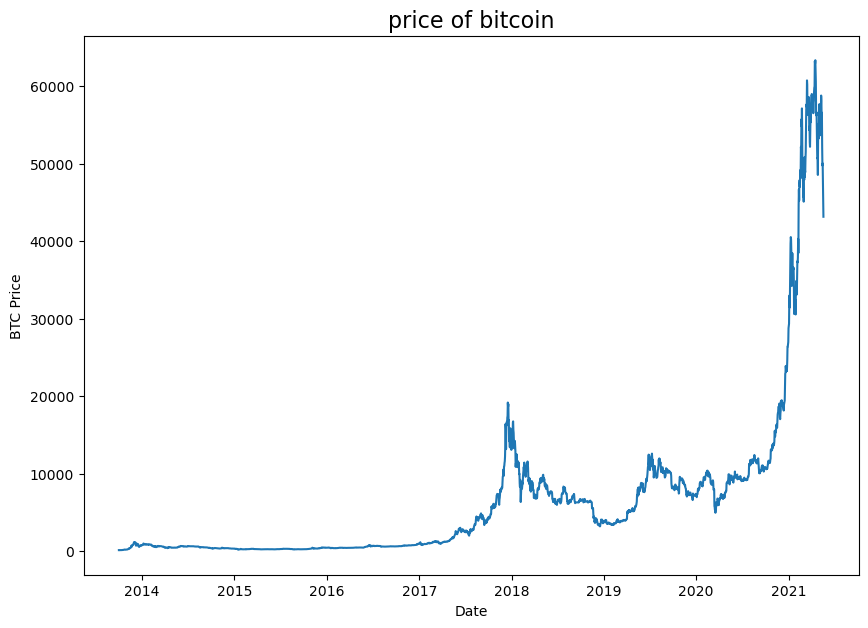

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("price of bitcoin", fontsize=16)
plt.xlabel("Date")

## Format data part 1: Create train and test sets

### the wrong way

In [9]:
from sklearn.model_selection import train_test_split
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

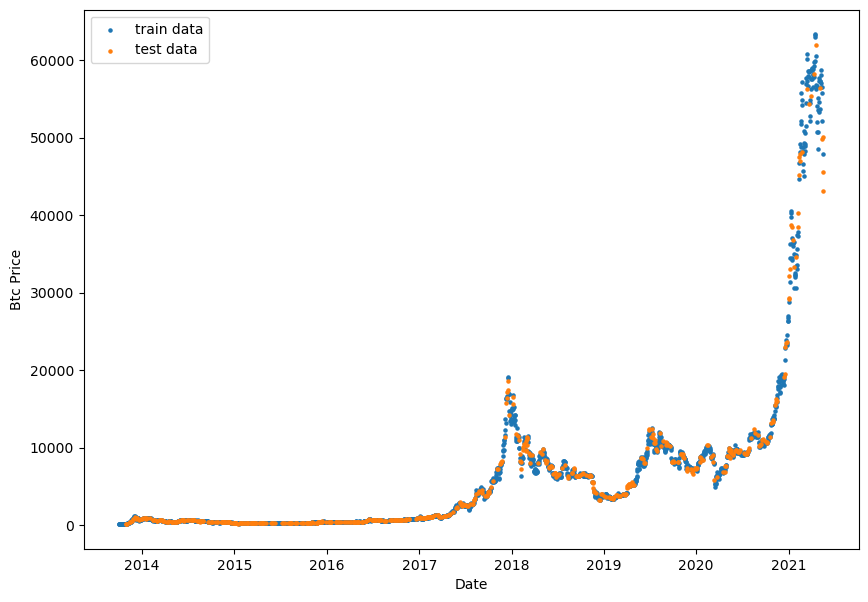

In [11]:
# plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("Btc Price")
plt.legend()

### the right way

In [12]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

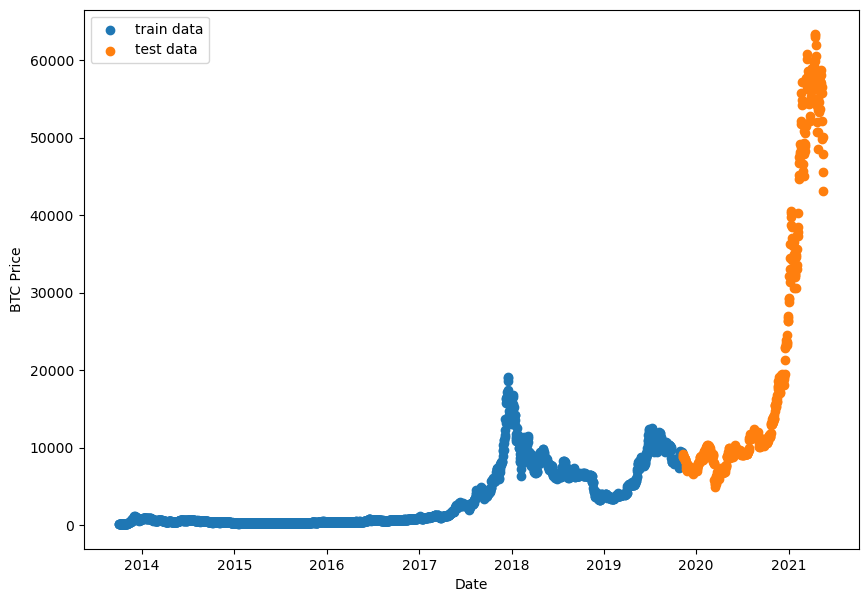

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_test, y_test, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend()

## Create a plotting function


In [14]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


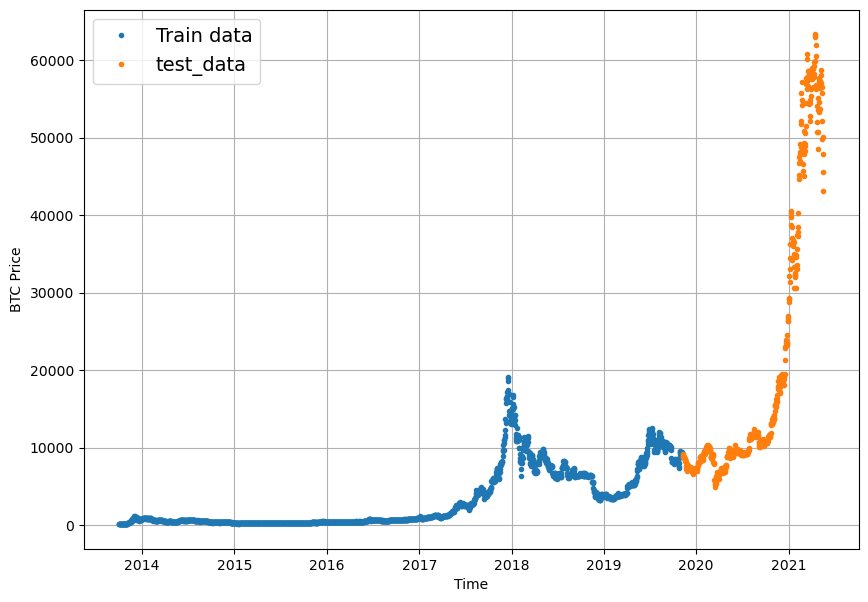

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test_data")

## Modelling Experiments

## Model 0: Naive forecast (baseline)

In [16]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

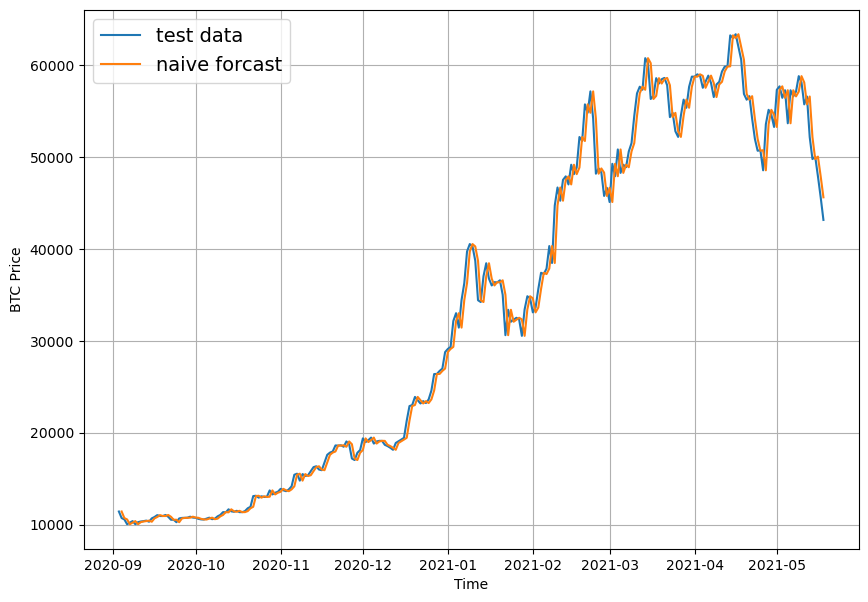

In [17]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format='-', label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=300, format='-', label="naive forcast")

## Evaluating a time series model
* MAE
* MSE
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error


In [18]:
import tensorflow as tf

C:\Users\my pc\.conda\envs\p3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182626

In [21]:
def evaluation_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  metrics = {}
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()

  metrics["mae"] = mae
  metrics["mse"] = mse
  metrics["mase"] = mase
  metrics["rmse"] = rmse
  metrics["mape"] = mape

  return metrics

In [22]:
naive_results = evaluation_preds(y_test[1:], naive_forecast)

## Format data part2: Windowing our dataset

In [23]:
HORIZON = 1
WINDOW_SIZE = 7


In [24]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [26]:
btc_windowed = []
for i in range(len(btc_price)):
  btc_windowed.append([btc_price[i:WINDOW_SIZE+i], btc_price[i+WINDOW_SIZE:i+WINDOW_SIZE+HORIZON]])

In [27]:
import numpy as np
# Create a function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  # print(f'window idexes:\n{window_indexes, window_indexes.shape}')

  windowed_array = x[window_indexes]
  # print(windowed_array)
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
for i in range(3):
  print(f'window:{full_windows[i]} -> horizon:{full_labels[i]}')

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> horizon:[123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> horizon:[124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> horizon:[125.96116]


In [30]:
for i in range(3):
  print(f'window:{full_windows[i-3]} -> horizon:{full_labels[i-3]}')

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> horizon:[47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> horizon:[45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> horizon:[43144.47129086]


## Turning windows into training and test sets

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):
  index = int(len(windows) * (1-test_split))
  X_train, y_train = windows[:index], labels[:index]
  X_test, y_test = windows[index:], labels[index:]
  return X_train, X_test, y_train, y_test


In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

## Make a modelling checkpoint


In [35]:
import os

# Create a function to implement a modelCheckpoint
def create_model_checkpoint(model_name, save_path="model_experiemnts"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

In [36]:
tf.random.set_seed(42)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', "mse"])

In [38]:
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 4637.1240 - mae: 4637.1240 - mse: 44251264.0000
Epoch 1: val_loss improved from inf to 5838.96191, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 63ms/step - loss: 2675.3831 - mae: 2675.3831 - mse: 19260550.0000 - val_loss: 5838.9619 - val_mae: 5838.9619 - val_mse: 61601040.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 701.0909 - mae: 701.0909 - mse: 1548175.2500
Epoch 2: val_loss improved from 5838.96191 to 966.03351, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 39ms/step - loss: 388.9602 - mae: 388.9602 - mse: 542633.2500 - val_loss: 966.0335 - val_mae: 966.0335 - val_mse: 3193409.2500
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 213.1740 - mae: 213.1740 - mse: 205827.7031
Epoch 3: val_loss did not improve from 966.03351
18/18 [==============================] - 0s 8ms/step - loss: 210.5842 - mae: 210.5842 - mse: 205817.0469 - val_loss: 994.5868 - val_mae: 994.5868 - val_mse: 3384880.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 241.2308 - mae: 241.2308 - mse: 302812.0000
Epoch 4: val_loss improved from 966.03351 to 937.49249, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 109ms/step - loss: 178.0005 - mae: 178.0005 - mse: 164292.2969 - val_loss: 937.4925 - val_mae: 937.4925 - val_mse: 2994653.5000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 167.0252 - mae: 167.0252 - mse: 148812.1562
Epoch 5: val_loss improved from 937.49249 to 915.31293, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 136ms/step - loss: 167.0252 - mae: 167.0252 - mse: 148812.1562 - val_loss: 915.3129 - val_mae: 915.3129 - val_mse: 2773753.0000
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 159.2714 - mae: 159.2714 - mse: 127752.2969
Epoch 6: val_loss improved from 915.31293 to 894.08313, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 161.7413 - mae: 161.7413 - mse: 140324.6250 - val_loss: 894.0831 - val_mae: 894.0831 - val_mse: 2721624.0000
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 166.6455 - mae: 166.6455 - mse: 154510.5312
Epoch 7: val_loss improved from 894.08313 to 885.89905, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 144ms/step - loss: 157.1602 - mae: 157.1602 - mse: 133016.9688 - val_loss: 885.8990 - val_mae: 885.8990 - val_mse: 2541256.5000
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 151.6469 - mae: 151.6469 - mse: 125912.4688
Epoch 8: val_loss improved from 885.89905 to 810.31140, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 87ms/step - loss: 151.4861 - mae: 151.4861 - mse: 124630.3750 - val_loss: 810.3114 - val_mae: 810.3114 - val_mse: 2220720.2500
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 147.7687 - mae: 147.7687 - mse: 119357.5781
Epoch 9: val_loss did not improve from 810.31140
18/18 [==============================] - 0s 7ms/step - loss: 145.0439 - mae: 145.0439 - mse: 114814.2266 - val_loss: 827.3261 - val_mae: 827.3261 - val_mse: 2130454.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 154.4319 - mae: 154.4319 - mse: 169642.4844
Epoch 10: val_loss improved from 810.31140 to 737.94495, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 137.5619 - mae: 137.5619 - mse: 105861.4062 - val_loss: 737.9449 - val_mae: 737.9449 - val_mse: 1796224.7500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 137.5399 - mae: 137.5399 - mse: 87491.5703
Epoch 11: val_loss improved from 737.94495 to 689.14844, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 128.3307 - mae: 128.3307 - mse: 93257.1328 - val_loss: 689.1484 - val_mae: 689.1484 - val_mse: 1599498.1250
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 117.2552 - mae: 117.2552 - mse: 69054.2344
Epoch 12: val_loss did not improve from 689.14844
18/18 [==============================] - 0s 6ms/step - loss: 124.1844 - mae: 124.1844 - mse: 88627.1953 - val_loss: 735.2862 - val_mae: 735.2862 - val_mse: 1660622.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 101.4623 - mae: 101.4623 - mse: 59435.9453
Epoch 13: val_loss did not improve from 689.14844
18/18 [==============================] - 0s 6ms/step - loss: 123.7881 - mae: 123.7881 - mse: 87650.4062 - val_loss: 696.0880 - val_mae: 696.0880 - val_mse: 1546397.2500
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 116.6713 - mae: 116.6713 - mse: 81130.4922
Epoch 14: val_loss improved from 689.14844 to 666.990

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 76ms/step - loss: 118.7673 - mae: 118.7673 - mse: 83197.7812 - val_loss: 666.9901 - val_mae: 666.9901 - val_mse: 1464913.5000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6792 - mae: 111.6792 - mse: 49801.9844
Epoch 15: val_loss improved from 666.99011 to 635.16656, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 119.5891 - mae: 119.5891 - mse: 82431.5078 - val_loss: 635.1666 - val_mae: 635.1666 - val_mse: 1397969.0000
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 115.6957 - mae: 115.6957 - mse: 79201.5938
Epoch 16: val_loss did not improve from 635.16656
18/18 [==============================] - 0s 9ms/step - loss: 115.6957 - mae: 115.6957 - mse: 79201.5938 - val_loss: 657.7195 - val_mae: 657.7195 - val_mse: 1421771.5000
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 112.8313 - mae: 112.8313 - mse: 73725.4297
Epoch 17: val_loss did not improve from 635.16656
18/18 [==============================] - 0s 9ms/step - loss: 115.1335 - mae: 115.1335 - mse: 79175.7266 - val_loss: 647.9255 - val_mae: 647.9255 - val_mse: 1392010.8750
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 119.0630 - mae: 119.0630 - mse: 83582.0547
Epoch 18: val_loss improved from 635.16656 to 617.899

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 83ms/step - loss: 114.6251 - mae: 114.6251 - mse: 78585.9531 - val_loss: 617.8998 - val_mae: 617.8998 - val_mse: 1341980.5000
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7362 - mae: 114.7362 - mse: 79004.3359
Epoch 19: val_loss did not improve from 617.89984
18/18 [==============================] - 0s 8ms/step - loss: 115.6480 - mae: 115.6480 - mse: 79351.9141 - val_loss: 658.5695 - val_mae: 658.5695 - val_mse: 1402008.7500
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 114.8111 - mae: 114.8111 - mse: 78717.8828 
Epoch 20: val_loss did not improve from 617.89984
18/18 [==============================] - 0s 8ms/step - loss: 114.8838 - mae: 114.8838 - mse: 78298.6562 - val_loss: 634.2473 - val_mae: 634.2473 - val_mse: 1349188.8750
Epoch 21/100
16/18 [=========================>....] - ETA: 0s - loss: 115.7778 - mae: 115.7778 - mse: 76401.1406
Epoch 21: val_loss improved from 617.89984 to 606.23

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 51ms/step - loss: 116.2070 - mae: 116.2070 - mse: 78722.5000 - val_loss: 606.2308 - val_mae: 606.2308 - val_mse: 1302662.6250
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 113.5089 - mae: 113.5089 - mse: 79598.9297 
Epoch 22: val_loss improved from 606.23077 to 602.95044, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 76ms/step - loss: 113.1275 - mae: 113.1275 - mse: 77713.5859 - val_loss: 602.9504 - val_mae: 602.9504 - val_mse: 1295226.6250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 118.5727 - mae: 118.5727 - mse: 62807.8750
Epoch 23: val_loss did not improve from 602.95044
18/18 [==============================] - 0s 7ms/step - loss: 113.0809 - mae: 113.0809 - mse: 76585.7734 - val_loss: 617.2761 - val_mae: 617.2761 - val_mse: 1327863.3750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 125.0358 - mae: 125.0358 - mse: 87171.0938
Epoch 24: val_loss improved from 602.95044 to 599.74451, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 76ms/step - loss: 113.1918 - mae: 113.1918 - mse: 77929.0156 - val_loss: 599.7445 - val_mae: 599.7445 - val_mse: 1284896.1250
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 112.4902 - mae: 112.4902 - mse: 75833.4609
Epoch 25: val_loss improved from 599.74451 to 598.72693, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 68ms/step - loss: 112.4902 - mae: 112.4902 - mse: 75833.4609 - val_loss: 598.7269 - val_mae: 598.7269 - val_mse: 1274727.7500
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 108.8612 - mae: 108.8612 - mse: 53489.6953
Epoch 26: val_loss improved from 598.72693 to 596.06891, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 71ms/step - loss: 113.2783 - mae: 113.2783 - mse: 75663.1719 - val_loss: 596.0689 - val_mae: 596.0689 - val_mse: 1272755.7500
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 112.9795 - mae: 112.9795 - mse: 76096.3203
Epoch 27: val_loss did not improve from 596.06891
18/18 [==============================] - 0s 27ms/step - loss: 112.9795 - mae: 112.9795 - mse: 76096.3203 - val_loss: 600.9399 - val_mae: 600.9399 - val_mse: 1268526.7500
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 111.7510 - mae: 111.7510 - mse: 76319.3828
Epoch 28: val_loss did not improve from 596.06891
18/18 [==============================] - 0s 18ms/step - loss: 112.1132 - mae: 112.1132 - mse: 75142.1719 - val_loss: 598.4647 - val_mae: 598.4647 - val_mse: 1274754.1250
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 111.5568 - mae: 111.5568 - mse: 81832.3906 
Epoch 29: val_loss did not improve from 596.06891


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 51ms/step - loss: 116.1917 - mae: 116.1917 - mse: 79231.9844 - val_loss: 591.0827 - val_mae: 591.0827 - val_mse: 1244661.0000
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 113.0759 - mae: 113.0759 - mse: 75324.4844 
Epoch 33: val_loss improved from 591.08270 to 587.10449, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 113.0759 - mae: 113.0759 - mse: 75324.4844 - val_loss: 587.1045 - val_mae: 587.1045 - val_mse: 1238647.8750
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 115.8095 - mae: 115.8095 - mse: 83784.2656 
Epoch 34: val_loss did not improve from 587.10449
18/18 [==============================] - 0s 12ms/step - loss: 116.1650 - mae: 116.1650 - mse: 78312.1562 - val_loss: 619.2469 - val_mae: 619.2469 - val_mse: 1287023.6250
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 113.2100 - mae: 113.2100 - mse: 76117.4141
Epoch 35: val_loss did not improve from 587.10449
18/18 [==============================] - 0s 26ms/step - loss: 113.2100 - mae: 113.2100 - mse: 76117.4141 - val_loss: 618.7316 - val_mae: 618.7316 - val_mse: 1285018.5000
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 126.9688 - mae: 126.9688 - mse: 84376.2109
Epoch 36: val_loss did not improve from 587.10449


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 113.8389 - mae: 113.8389 - mse: 74825.0547 - val_loss: 586.5364 - val_mae: 586.5364 - val_mse: 1230693.2500
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 112.0001 - mae: 112.0001 - mse: 74641.1562
Epoch 38: val_loss did not improve from 586.53638
18/18 [==============================] - 0s 8ms/step - loss: 111.5075 - mae: 111.5075 - mse: 74125.1875 - val_loss: 597.0527 - val_mae: 597.0527 - val_mse: 1259705.7500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 125.7072 - mae: 125.7072 - mse: 110291.8125
Epoch 39: val_loss did not improve from 586.53638
18/18 [==============================] - 0s 7ms/step - loss: 111.7577 - mae: 111.7577 - mse: 73650.1562 - val_loss: 639.2670 - val_mae: 639.2670 - val_mse: 1350548.0000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 104.8598 - mae: 104.8598 - mse: 101722.7266
Epoch 40: val_loss improved from 586.53638 to 581.6

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 71ms/step - loss: 110.0782 - mae: 110.0782 - mse: 74202.2422 - val_loss: 581.6055 - val_mae: 581.6055 - val_mse: 1221544.2500
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 101.0219 - mae: 101.0219 - mse: 43532.7695
Epoch 41: val_loss did not improve from 581.60547
18/18 [==============================] - 0s 7ms/step - loss: 110.9166 - mae: 110.9166 - mse: 73689.0703 - val_loss: 646.8159 - val_mae: 646.8159 - val_mse: 1366884.0000
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 113.5468 - mae: 113.5468 - mse: 76016.0859
Epoch 42: val_loss did not improve from 581.60547
18/18 [==============================] - 0s 7ms/step - loss: 113.5468 - mae: 113.5468 - mse: 76016.0859 - val_loss: 595.3640 - val_mae: 595.3640 - val_mse: 1235476.7500
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 90.9901 - mae: 90.9901 - mse: 50870.9805
Epoch 43: val_loss did not improve from 581.60547
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 78ms/step - loss: 111.9745 - mae: 111.9745 - mse: 73973.5547 - val_loss: 577.0848 - val_mae: 577.0848 - val_mse: 1210933.6250
Epoch 47/100
13/18 [====================>.........] - ETA: 0s - loss: 102.0096 - mae: 102.0096 - mse: 70630.8438
Epoch 47: val_loss did not improve from 577.08478
18/18 [==============================] - 0s 9ms/step - loss: 109.9255 - mae: 109.9255 - mse: 74344.9375 - val_loss: 595.8978 - val_mae: 595.8978 - val_mse: 1232527.7500
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 96.5321 - mae: 96.5321 - mse: 53570.2305
Epoch 48: val_loss did not improve from 577.08478
18/18 [==============================] - 0s 7ms/step - loss: 108.6712 - mae: 108.6712 - mse: 71947.8203 - val_loss: 608.0927 - val_mae: 608.0927 - val_mse: 1253854.1250
Epoch 49/100
15/18 [========================>.....] - ETA: 0s - loss: 110.4450 - mae: 110.4450 - mse: 76410.0938 
Epoch 49: val_loss did not improve from 577.08478
18/1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 68ms/step - loss: 108.6341 - mae: 108.6341 - mse: 71584.9297 - val_loss: 573.4690 - val_mae: 573.4690 - val_mse: 1185810.5000
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 122.0300 - mae: 122.0300 - mse: 122327.0469
Epoch 73: val_loss did not improve from 573.46899
18/18 [==============================] - 0s 7ms/step - loss: 109.0965 - mae: 109.0965 - mse: 71306.7734 - val_loss: 587.2892 - val_mae: 587.2892 - val_mse: 1218586.5000
Epoch 74/100
16/18 [=========================>....] - ETA: 0s - loss: 108.0699 - mae: 108.0699 - mse: 73381.1016 
Epoch 74: val_loss improved from 573.46899 to 570.44513, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 108.5022 - mae: 108.5022 - mse: 71916.1641 - val_loss: 570.4451 - val_mae: 570.4451 - val_mse: 1184436.5000
Epoch 75/100
15/18 [========================>.....] - ETA: 0s - loss: 108.2912 - mae: 108.2912 - mse: 71937.5078
Epoch 75: val_loss did not improve from 570.44513
18/18 [==============================] - 0s 9ms/step - loss: 107.7952 - mae: 107.7952 - mse: 70743.0781 - val_loss: 585.1683 - val_mae: 585.1683 - val_mse: 1202060.8750
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 75.9138 - mae: 75.9138 - mse: 24291.1914
Epoch 76: val_loss improved from 570.44513 to 569.94141, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 61ms/step - loss: 108.8960 - mae: 108.8960 - mse: 71642.8516 - val_loss: 569.9414 - val_mae: 569.9414 - val_mse: 1182251.7500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.8654 - mae: 83.8654 - mse: 62216.2930
Epoch 77: val_loss did not improve from 569.94141
18/18 [==============================] - 0s 5ms/step - loss: 108.8235 - mae: 108.8235 - mse: 70713.3125 - val_loss: 586.9242 - val_mae: 586.9242 - val_mse: 1215342.5000
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 107.0240 - mae: 107.0240 - mse: 49694.5000
Epoch 78: val_loss did not improve from 569.94141
18/18 [==============================] - 0s 4ms/step - loss: 107.5610 - mae: 107.5610 - mse: 70233.7734 - val_loss: 570.7337 - val_mae: 570.7337 - val_mse: 1183873.5000
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 105.4307 - mae: 105.4307 - mse: 51095.3711
Epoch 79: val_loss did not improve from 569.94141
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 30ms/step - loss: 106.5328 - mae: 106.5328 - mse: 70158.5000 - val_loss: 569.2095 - val_mae: 569.2095 - val_mse: 1177443.0000
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 190.2465 - mae: 190.2465 - mse: 232431.1562
Epoch 82: val_loss did not improve from 569.20953
18/18 [==============================] - 0s 5ms/step - loss: 116.1973 - mae: 116.1973 - mse: 77379.5781 - val_loss: 584.1649 - val_mae: 584.1649 - val_mse: 1208229.1250
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3085 - mae: 108.3085 - mse: 96286.1016
Epoch 83: val_loss did not improve from 569.20953
18/18 [==============================] - 0s 5ms/step - loss: 110.8492 - mae: 110.8492 - mse: 72725.7266 - val_loss: 647.8950 - val_mae: 647.8950 - val_mse: 1346308.1250
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 117.8020 - mae: 117.8020 - mse: 85885.7812
Epoch 84: val_loss did not improve from 569.20953
18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 74ms/step - loss: 108.1637 - mae: 108.1637 - mse: 69312.0781 - val_loss: 569.1461 - val_mae: 569.1461 - val_mse: 1177196.3750
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4652 - mae: 132.4652 - mse: 125308.5078
Epoch 88: val_loss did not improve from 569.14606
18/18 [==============================] - 0s 6ms/step - loss: 107.3139 - mae: 107.3139 - mse: 70898.0469 - val_loss: 583.5323 - val_mae: 583.5323 - val_mse: 1204834.7500
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 102.3953 - mae: 102.3953 - mse: 61699.6953
Epoch 89: val_loss did not improve from 569.14606
18/18 [==============================] - 0s 5ms/step - loss: 107.9931 - mae: 107.9931 - mse: 69538.6250 - val_loss: 575.0898 - val_mae: 575.0898 - val_mse: 1188424.6250
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 122.0627 - mae: 122.0627 - mse: 69847.9219
Epoch 90: val_loss did not improve from 569.14606
18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 37ms/step - loss: 109.2523 - mae: 109.2523 - mse: 71498.9688 - val_loss: 567.3488 - val_mae: 567.3488 - val_mse: 1171454.3750
Epoch 93/100
18/18 [==============================] - ETA: 0s - loss: 112.3847 - mae: 112.3847 - mse: 72783.5156
Epoch 93: val_loss did not improve from 567.34882
18/18 [==============================] - 0s 7ms/step - loss: 112.3847 - mae: 112.3847 - mse: 72783.5156 - val_loss: 607.1058 - val_mae: 607.1058 - val_mse: 1250482.8750
Epoch 94/100
11/18 [=================>............] - ETA: 0s - loss: 108.5602 - mae: 108.5602 - mse: 70347.7812
Epoch 94: val_loss did not improve from 567.34882
18/18 [==============================] - 0s 23ms/step - loss: 109.9535 - mae: 109.9535 - mse: 72074.4219 - val_loss: 615.1871 - val_mae: 615.1871 - val_mse: 1259169.3750
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 108.3466 - mae: 108.3466 - mse: 73396.8125 
Epoch 95: val_loss improved from 567.34882 to 567.2

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 107.7049 - mae: 107.7049 - mse: 68894.4609 - val_loss: 567.2955 - val_mae: 567.2955 - val_mse: 1170814.1250
Epoch 96/100
 1/18 [>.............................] - ETA: 0s - loss: 108.9290 - mae: 108.9290 - mse: 67888.4922
Epoch 96: val_loss did not improve from 567.29547
18/18 [==============================] - 0s 5ms/step - loss: 115.4106 - mae: 115.4106 - mse: 74140.0781 - val_loss: 621.7397 - val_mae: 621.7397 - val_mse: 1281617.6250
Epoch 97/100
 1/18 [>.............................] - ETA: 0s - loss: 105.3310 - mae: 105.3310 - mse: 98470.3906
Epoch 97: val_loss did not improve from 567.29547
18/18 [==============================] - 0s 6ms/step - loss: 109.0296 - mae: 109.0296 - mse: 71580.6875 - val_loss: 586.5807 - val_mae: 586.5807 - val_mse: 1209447.2500
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 119.7516 - mae: 119.7516 - mse: 66126.1875
Epoch 98: val_loss did not improve from 567.29547
18/

In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 603.5045 - mae: 603.5045 - mse: 1233411.1250


[603.5044555664062, 603.5044555664062, 1233411.125]

In [40]:
# Load in the best performing model_1
model_1 = tf.keras.models.load_model("model_experiemnts/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.2955 - mae: 567.2955 - mse: 1170814.1250


[567.2954711914062, 567.2954711914062, 1170814.125]

## Making forecasts with a model (on the test dataset)

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8891.4   , 8790.098 , 9046.034 , 8832.3955, 8750.616 , 8752.114 ,
        8716.521 , 8541.713 , 8480.091 , 8546.259 ], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_1_preds)
model_1_results

{'mae': 567.29553,
 'mse': 1170814.1,
 'mase': 0.99658114,
 'rmse': 1082.0416,
 'mape': 2.5469515}

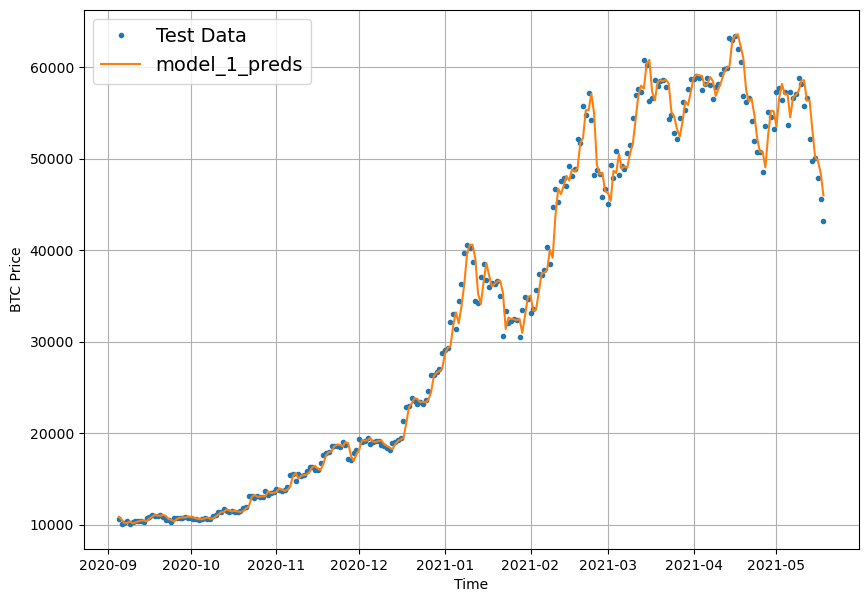

In [44]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense(window=30, horizon=1)

In [45]:
windows, labels = make_windows(prices, window_size=30, horizon=1)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)


In [46]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation='linear')
], name="model_2_dense")

model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_2 = model_2.fit(train_windows,
                             train_labels,
                             validation_data=(test_windows, test_labels),
                             epochs=100,
                             batch_size=128,
                             verbose=0,
                             callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 2222.13721, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 2: val_loss did not improve from 2222.13721

Epoch 3: val_loss improved from 2222.13721 to 1275.13855, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 4: val_loss improved from 1275.13855 to 1124.79431, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 5: val_loss improved from 1124.79431 to 1041.40381, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 6: val_loss improved from 1041.40381 to 1015.49921, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 7: val_loss improved from 1015.49921 to 986.84827, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 8: val_loss improved from 986.84827 to 911.41760, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 9: val_loss improved from 911.41760 to 886.21661, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 10: val_loss improved from 886.21661 to 840.92975, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 11: val_loss did not improve from 840.92975

Epoch 12: val_loss improved from 840.92975 to 802.32928, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 13: val_loss did not improve from 802.32928

Epoch 14: val_loss improved from 802.32928 to 773.31958, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 15: val_loss did not improve from 773.31958

Epoch 16: val_loss did not improve from 773.31958

Epoch 17: val_loss did not improve from 773.31958

Epoch 18: val_loss did not improve from 773.31958

Epoch 19: val_loss did not improve from 773.31958

Epoch 20: val_loss did not improve from 773.31958

Epoch 21: val_loss did not improve from 773.31958

Epoch 22: val_loss improved from 773.31958 to 711.61853, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 23: val_loss did not improve from 711.61853

Epoch 24: val_loss improved from 711.61853 to 707.71399, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 25: val_loss did not improve from 707.71399

Epoch 26: val_loss did not improve from 707.71399

Epoch 27: val_loss improved from 707.71399 to 687.19867, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 28: val_loss did not improve from 687.19867

Epoch 29: val_loss did not improve from 687.19867

Epoch 30: val_loss did not improve from 687.19867

Epoch 31: val_loss did not improve from 687.19867

Epoch 32: val_loss did not improve from 687.19867

Epoch 33: val_loss improved from 687.19867 to 675.92279, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 34: val_loss did not improve from 675.92279

Epoch 35: val_loss did not improve from 675.92279

Epoch 36: val_loss did not improve from 675.92279

Epoch 37: val_loss did not improve from 675.92279

Epoch 38: val_loss improved from 675.92279 to 662.56531, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 39: val_loss did not improve from 662.56531

Epoch 40: val_loss did not improve from 662.56531

Epoch 41: val_loss did not improve from 662.56531

Epoch 42: val_loss did not improve from 662.56531

Epoch 43: val_loss did not improve from 662.56531

Epoch 44: val_loss did not improve from 662.56531

Epoch 45: val_loss did not improve from 662.56531

Epoch 46: val_loss did not improve from 662.56531

Epoch 47: val_loss did not improve from 662.56531

Epoch 48: val_loss improved from 662.56531 to 657.59558, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 49: val_loss did not improve from 657.59558

Epoch 50: val_loss did not improve from 657.59558

Epoch 51: val_loss improved from 657.59558 to 647.34332, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 52: val_loss did not improve from 647.34332

Epoch 53: val_loss did not improve from 647.34332

Epoch 54: val_loss did not improve from 647.34332

Epoch 55: val_loss did not improve from 647.34332

Epoch 56: val_loss improved from 647.34332 to 646.93549, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 57: val_loss did not improve from 646.93549

Epoch 58: val_loss improved from 646.93549 to 638.72363, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 59: val_loss did not improve from 638.72363

Epoch 60: val_loss did not improve from 638.72363

Epoch 61: val_loss improved from 638.72363 to 632.76508, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 62: val_loss did not improve from 632.76508

Epoch 63: val_loss did not improve from 632.76508

Epoch 64: val_loss did not improve from 632.76508

Epoch 65: val_loss improved from 632.76508 to 626.66901, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 66: val_loss did not improve from 626.66901

Epoch 67: val_loss did not improve from 626.66901

Epoch 68: val_loss did not improve from 626.66901

Epoch 69: val_loss did not improve from 626.66901

Epoch 70: val_loss did not improve from 626.66901

Epoch 71: val_loss did not improve from 626.66901

Epoch 72: val_loss did not improve from 626.66901

Epoch 73: val_loss did not improve from 626.66901

Epoch 74: val_loss did not improve from 626.66901

Epoch 75: val_loss did not improve from 626.66901

Epoch 76: val_loss did not improve from 626.66901

Epoch 77: val_loss did not improve from 626.66901

Epoch 78: val_loss did not improve from 626.66901

Epoch 79: val_loss did not improve from 626.66901

Epoch 80: val_loss did not improve from 626.66901

Epoch 81: val_loss did not improve from 626.66901

Epoch 82: val_loss did not improve from 626.66901

Epoch 83: val_loss did not improve from 626.66901

Epoch 84: val_loss improved from 626.66901 to 623.03009, saving model to model_ex

INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 85: val_loss did not improve from 623.03009

Epoch 86: val_loss did not improve from 623.03009

Epoch 87: val_loss improved from 623.03009 to 620.39960, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 88: val_loss did not improve from 620.39960

Epoch 89: val_loss did not improve from 620.39960

Epoch 90: val_loss did not improve from 620.39960

Epoch 91: val_loss did not improve from 620.39960

Epoch 92: val_loss did not improve from 620.39960

Epoch 93: val_loss did not improve from 620.39960

Epoch 94: val_loss did not improve from 620.39960

Epoch 95: val_loss did not improve from 620.39960

Epoch 96: val_loss did not improve from 620.39960

Epoch 97: val_loss did not improve from 620.39960

Epoch 98: val_loss improved from 620.39960 to 616.99231, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 99: val_loss did not improve from 616.99231

Epoch 100: val_loss improved from 616.99231 to 603.86609, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 603.8661 - mae: 603.8661 - mse: 1275169.7500


[603.8660888671875, 603.8660888671875, 1275169.75]

In [48]:
model_2 = tf.keras.models.load_model("model_experiemnts/model_2_dense/")

In [49]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


In [50]:
model_2_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)

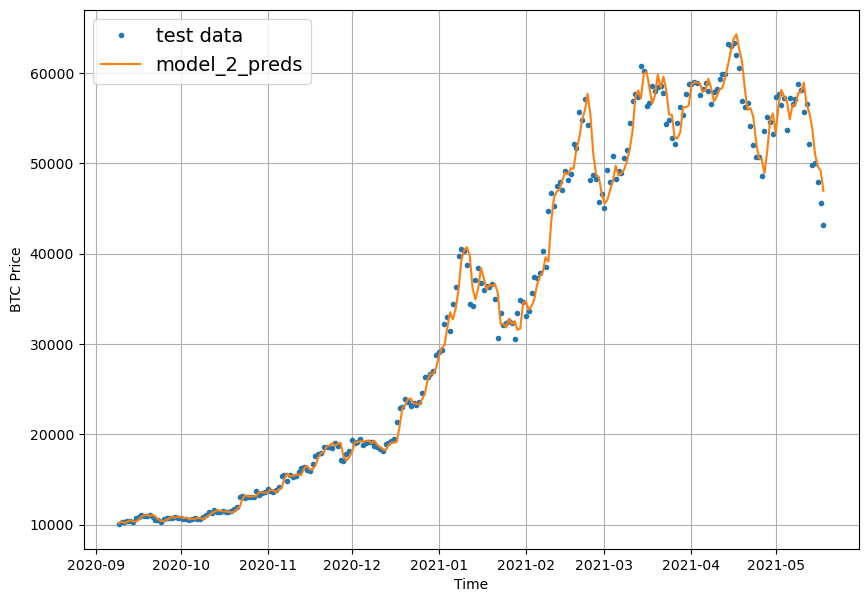

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset,format="-", label="model_2_preds")


## Model 3: Dense(window=30, horizon=7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30
windows, labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)

In [53]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_3 = model_3.fit(train_windows,
                             train_labels,
                             epochs=100,
                             batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 3575.66187, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 2: val_loss improved from 3575.66187 to 2563.36890, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 3: val_loss improved from 2563.36890 to 2079.39600, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 4: val_loss improved from 2079.39600 to 1851.51746, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 5: val_loss improved from 1851.51746 to 1806.95972, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 6: val_loss improved from 1806.95972 to 1635.04150, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 7: val_loss improved from 1635.04150 to 1495.92175, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 8: val_loss did not improve from 1495.92175

Epoch 9: val_loss did not improve from 1495.92175

Epoch 10: val_loss improved from 1495.92175 to 1443.18665, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 11: val_loss improved from 1443.18665 to 1429.56812, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 12: val_loss did not improve from 1429.56812

Epoch 13: val_loss improved from 1429.56812 to 1417.40027, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 14: val_loss did not improve from 1417.40027

Epoch 15: val_loss did not improve from 1417.40027

Epoch 16: val_loss did not improve from 1417.40027

Epoch 17: val_loss did not improve from 1417.40027

Epoch 18: val_loss did not improve from 1417.40027

Epoch 19: val_loss did not improve from 1417.40027

Epoch 20: val_loss did not improve from 1417.40027

Epoch 21: val_loss improved from 1417.40027 to 1373.33374, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 22: val_loss improved from 1373.33374 to 1354.98059, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 23: val_loss did not improve from 1354.98059

Epoch 24: val_loss did not improve from 1354.98059

Epoch 25: val_loss did not improve from 1354.98059

Epoch 26: val_loss did not improve from 1354.98059

Epoch 27: val_loss did not improve from 1354.98059

Epoch 28: val_loss did not improve from 1354.98059

Epoch 29: val_loss improved from 1354.98059 to 1353.31592, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 30: val_loss did not improve from 1353.31592

Epoch 31: val_loss improved from 1353.31592 to 1331.18323, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 32: val_loss improved from 1331.18323 to 1303.08618, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 33: val_loss did not improve from 1303.08618

Epoch 34: val_loss did not improve from 1303.08618

Epoch 35: val_loss did not improve from 1303.08618

Epoch 36: val_loss did not improve from 1303.08618

Epoch 37: val_loss did not improve from 1303.08618

Epoch 38: val_loss did not improve from 1303.08618

Epoch 39: val_loss did not improve from 1303.08618

Epoch 40: val_loss did not improve from 1303.08618

Epoch 41: val_loss improved from 1303.08618 to 1298.31421, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 42: val_loss did not improve from 1298.31421

Epoch 43: val_loss improved from 1298.31421 to 1284.08887, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 44: val_loss did not improve from 1284.08887

Epoch 45: val_loss did not improve from 1284.08887

Epoch 46: val_loss did not improve from 1284.08887

Epoch 47: val_loss did not improve from 1284.08887

Epoch 48: val_loss did not improve from 1284.08887

Epoch 49: val_loss did not improve from 1284.08887

Epoch 50: val_loss did not improve from 1284.08887

Epoch 51: val_loss did not improve from 1284.08887

Epoch 52: val_loss did not improve from 1284.08887

Epoch 53: val_loss improved from 1284.08887 to 1251.62793, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 54: val_loss did not improve from 1251.62793

Epoch 55: val_loss did not improve from 1251.62793

Epoch 56: val_loss did not improve from 1251.62793

Epoch 57: val_loss did not improve from 1251.62793

Epoch 58: val_loss did not improve from 1251.62793

Epoch 59: val_loss did not improve from 1251.62793

Epoch 60: val_loss did not improve from 1251.62793

Epoch 61: val_loss did not improve from 1251.62793

Epoch 62: val_loss did not improve from 1251.62793

Epoch 63: val_loss did not improve from 1251.62793

Epoch 64: val_loss improved from 1251.62793 to 1239.59094, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 65: val_loss did not improve from 1239.59094

Epoch 66: val_loss did not improve from 1239.59094

Epoch 67: val_loss did not improve from 1239.59094

Epoch 68: val_loss did not improve from 1239.59094

Epoch 69: val_loss did not improve from 1239.59094

Epoch 70: val_loss did not improve from 1239.59094

Epoch 71: val_loss did not improve from 1239.59094

Epoch 72: val_loss did not improve from 1239.59094

Epoch 73: val_loss did not improve from 1239.59094

Epoch 74: val_loss did not improve from 1239.59094

Epoch 75: val_loss did not improve from 1239.59094

Epoch 76: val_loss did not improve from 1239.59094

Epoch 77: val_loss did not improve from 1239.59094

Epoch 78: val_loss did not improve from 1239.59094

Epoch 79: val_loss did not improve from 1239.59094

Epoch 80: val_loss did not improve from 1239.59094

Epoch 81: val_loss did not improve from 1239.59094

Epoch 82: val_loss did not improve from 1239.59094

Epoch 83: val_loss did not improve from 1239.59094

Epoch 84: v

INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 93: val_loss did not improve from 1230.50635

Epoch 94: val_loss did not improve from 1230.50635

Epoch 95: val_loss did not improve from 1230.50635

Epoch 96: val_loss did not improve from 1230.50635

Epoch 97: val_loss did not improve from 1230.50635

Epoch 98: val_loss did not improve from 1230.50635

Epoch 99: val_loss did not improve from 1230.50635

Epoch 100: val_loss did not improve from 1230.50635


In [54]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1362.0386 - mae: 1362.0386 - mse: 5973523.5000


[1362.03857421875, 1362.03857421875, 5973523.5]

In [55]:
model_3 = tf.keras.models.load_model("model_experiemnts/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 9ms/step - loss: 1230.5063 - mae: 1230.5063 - mse: 5388086.5000


[1230.50634765625, 1230.50634765625, 5388086.5]

In [56]:
model_3_preds = make_preds(model_3, 
                          input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


## Make our evaluation function work for larger horizons

In [57]:
def evaluation_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    metrics = {}
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        mase = tf.reduce_mean(mase)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)

    metrics["mae"] = mae.numpy()
    metrics["mse"] = mse.numpy()
    metrics["mase"] = mase.numpy()
    metrics["rmse"] = rmse.numpy()
    metrics["mape"] = mape.numpy()
    

    return metrics

In [58]:
# Get moddel_3 results aggregated to single values
model_3_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_3_preds)
model_3_results

{'mae': 1230.5062,
 'mse': 5388086.5,
 'mase': 2.189617,
 'rmse': 1412.0441,
 'mape': 5.5814147}

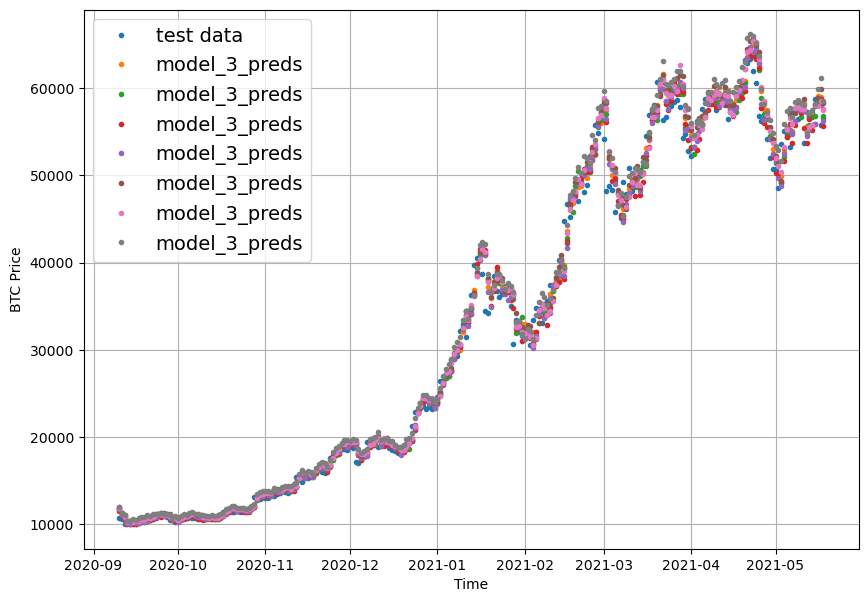

In [59]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

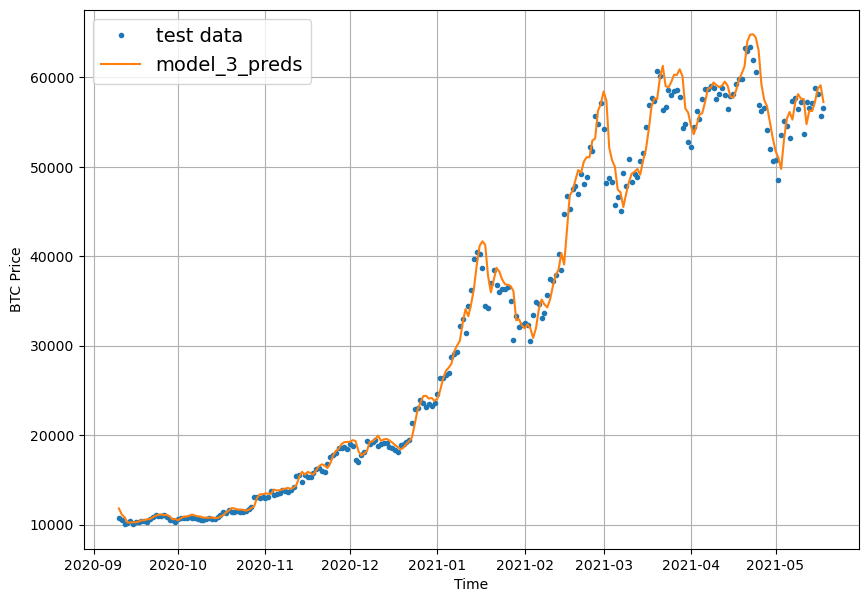

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,  label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),format="-", start=offset, label="model_3_preds")

## the best model so far

<Axes: >

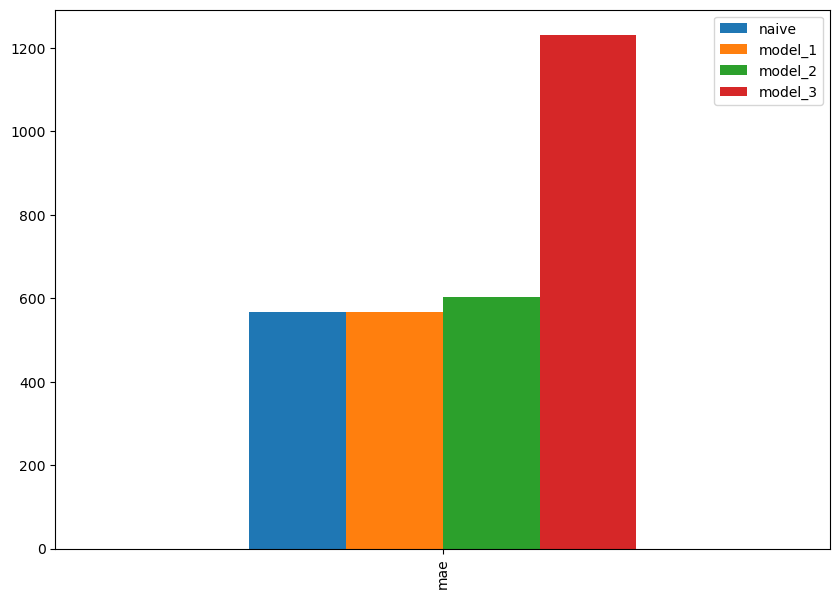

In [61]:
pd.DataFrame({"naive":naive_results["mae"],
             "model_1":model_1_results["mae"],
             "model_2":model_2_results["mae"],
             "model_3":model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [62]:
HORIZON = 1
WINDOW_SIZE = 7


In [63]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [64]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [65]:
train_windows[0].shape

(7,)

In [66]:
# before we pass our data to the conv1d layer we have to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [67]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [68]:
# Test out our lambda layer
print(f'original shape:{x.shape}')
print(f'expanded shape:{expand_dims_layer(x).shape}')
print(expand_dims_layer(x))

original shape:(7,)
expanded shape:(7, 1)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [69]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

history_model_4 = model_4.fit(train_windows, 
                             train_labels, 
                             epochs=100,
                              batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1: val_loss improved from inf to 2517.21265, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 2: val_loss improved from 2517.21265 to 1396.53540, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 3: val_loss improved from 1396.53540 to 1146.85425, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 4: val_loss improved from 1146.85425 to 952.74316, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 5: val_loss improved from 952.74316 to 943.54419, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 6: val_loss improved from 943.54419 to 912.77661, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 7: val_loss improved from 912.77661 to 910.27740, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 8: val_loss improved from 910.27740 to 877.39563, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 9: val_loss did not improve from 877.39563

Epoch 10: val_loss improved from 877.39563 to 844.96289, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 11: val_loss improved from 844.96289 to 843.64624, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 12: val_loss improved from 843.64624 to 835.88812, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 13: val_loss did not improve from 835.88812

Epoch 14: val_loss improved from 835.88812 to 820.97498, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 15: val_loss improved from 820.97498 to 790.76300, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 16: val_loss did not improve from 790.76300

Epoch 17: val_loss did not improve from 790.76300

Epoch 18: val_loss improved from 790.76300 to 774.48022, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 19: val_loss improved from 774.48022 to 759.18567, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 20: val_loss improved from 759.18567 to 719.92731, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 21: val_loss did not improve from 719.92731

Epoch 22: val_loss improved from 719.92731 to 719.63074, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 23: val_loss did not improve from 719.63074

Epoch 24: val_loss improved from 719.63074 to 683.03113, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 25: val_loss improved from 683.03113 to 674.90851, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 26: val_loss improved from 674.90851 to 668.77130, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 27: val_loss improved from 668.77130 to 661.79468, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 28: val_loss improved from 661.79468 to 656.17365, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 29: val_loss did not improve from 656.17365

Epoch 30: val_loss did not improve from 656.17365

Epoch 31: val_loss did not improve from 656.17365

Epoch 32: val_loss did not improve from 656.17365

Epoch 33: val_loss did not improve from 656.17365

Epoch 34: val_loss improved from 656.17365 to 646.14160, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 35: val_loss improved from 646.14160 to 630.16278, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 36: val_loss improved from 630.16278 to 625.77747, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 37: val_loss did not improve from 625.77747

Epoch 38: val_loss improved from 625.77747 to 617.08313, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 39: val_loss improved from 617.08313 to 613.58575, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 40: val_loss improved from 613.58575 to 612.36713, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 41: val_loss did not improve from 612.36713

Epoch 42: val_loss did not improve from 612.36713

Epoch 43: val_loss did not improve from 612.36713

Epoch 44: val_loss improved from 612.36713 to 603.21838, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 45: val_loss did not improve from 603.21838

Epoch 46: val_loss improved from 603.21838 to 595.97559, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 47: val_loss did not improve from 595.97559

Epoch 48: val_loss did not improve from 595.97559

Epoch 49: val_loss did not improve from 595.97559

Epoch 50: val_loss did not improve from 595.97559

Epoch 51: val_loss did not improve from 595.97559

Epoch 52: val_loss improved from 595.97559 to 586.89636, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 53: val_loss did not improve from 586.89636

Epoch 54: val_loss did not improve from 586.89636

Epoch 55: val_loss did not improve from 586.89636

Epoch 56: val_loss did not improve from 586.89636

Epoch 57: val_loss did not improve from 586.89636

Epoch 58: val_loss did not improve from 586.89636

Epoch 59: val_loss did not improve from 586.89636

Epoch 60: val_loss did not improve from 586.89636

Epoch 61: val_loss improved from 586.89636 to 578.93634, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 62: val_loss did not improve from 578.93634

Epoch 63: val_loss did not improve from 578.93634

Epoch 64: val_loss did not improve from 578.93634

Epoch 65: val_loss did not improve from 578.93634

Epoch 66: val_loss improved from 578.93634 to 575.31427, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 67: val_loss did not improve from 575.31427

Epoch 68: val_loss did not improve from 575.31427

Epoch 69: val_loss did not improve from 575.31427

Epoch 70: val_loss did not improve from 575.31427

Epoch 71: val_loss did not improve from 575.31427

Epoch 72: val_loss improved from 575.31427 to 574.86517, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 73: val_loss improved from 574.86517 to 574.84149, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 74: val_loss did not improve from 574.84149

Epoch 75: val_loss did not improve from 574.84149

Epoch 76: val_loss did not improve from 574.84149

Epoch 77: val_loss improved from 574.84149 to 572.42236, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 78: val_loss did not improve from 572.42236

Epoch 79: val_loss did not improve from 572.42236

Epoch 80: val_loss did not improve from 572.42236

Epoch 81: val_loss improved from 572.42236 to 572.09741, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 82: val_loss did not improve from 572.09741

Epoch 83: val_loss did not improve from 572.09741

Epoch 84: val_loss did not improve from 572.09741

Epoch 85: val_loss did not improve from 572.09741

Epoch 86: val_loss did not improve from 572.09741

Epoch 87: val_loss did not improve from 572.09741

Epoch 88: val_loss did not improve from 572.09741

Epoch 89: val_loss improved from 572.09741 to 568.23474, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 90: val_loss did not improve from 568.23474

Epoch 91: val_loss did not improve from 568.23474

Epoch 92: val_loss did not improve from 568.23474

Epoch 93: val_loss did not improve from 568.23474

Epoch 94: val_loss did not improve from 568.23474

Epoch 95: val_loss improved from 568.23474 to 567.57935, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 96: val_loss did not improve from 567.57935

Epoch 97: val_loss did not improve from 567.57935

Epoch 98: val_loss did not improve from 567.57935

Epoch 99: val_loss did not improve from 567.57935

Epoch 100: val_loss did not improve from 567.57935


In [70]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 12ms/step - loss: 724.3977


724.397705078125

In [72]:
model_4 = tf.keras.models.load_model("model_experiemnts/model_4")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.5794


567.5794067382812

In [73]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8895.631, 8799.039, 9046.079, 8815.355, 8747.977, 8761.903,
       8710.297, 8541.827, 8482.592, 8545.821], dtype=float32)>

In [74]:
model_4_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_4_preds)
model_4_results

{'mae': 567.5794,
 'mse': 1172667.4,
 'mase': 0.9970798,
 'rmse': 1082.8977,
 'mape': 2.5395014}

In [75]:
model_1_results

{'mae': 567.29553,
 'mse': 1170814.1,
 'mase': 0.99658114,
 'rmse': 1082.0416,
 'mape': 2.5469515}

## Model 5: RNN(LSTM)

In [76]:
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE,))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1))(inputs)
# x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name="model_5")
model_5.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())
model_5.fit(train_windows,
           train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2870.0012
Epoch 1: val_loss improved from inf to 6934.47998, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 5s 151ms/step - loss: 2581.3918 - val_loss: 6934.4800
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 458.6635
Epoch 2: val_loss improved from 6934.47998 to 1370.23950, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 140ms/step - loss: 458.6635 - val_loss: 1370.2395
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 199.7547
Epoch 3: val_loss improved from 1370.23950 to 977.04224, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 227ms/step - loss: 194.5851 - val_loss: 977.0422
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 173.6554
Epoch 4: val_loss improved from 977.04224 to 975.09418, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 244ms/step - loss: 171.9849 - val_loss: 975.0942
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 170.4412
Epoch 5: val_loss did not improve from 975.09418
18/18 [==============================] - 0s 9ms/step - loss: 166.8490 - val_loss: 1002.6086
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 165.8001
Epoch 6: val_loss improved from 975.09418 to 897.48981, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 139ms/step - loss: 161.9910 - val_loss: 897.4898
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 163.6472
Epoch 7: val_loss did not improve from 897.48981
18/18 [==============================] - 0s 18ms/step - loss: 160.0843 - val_loss: 901.1216
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 163.3436
Epoch 8: val_loss did not improve from 897.48981
18/18 [==============================] - 0s 12ms/step - loss: 166.3133 - val_loss: 898.9818
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 169.6713
Epoch 9: val_loss did not improve from 897.48981
18/18 [==============================] - 0s 12ms/step - loss: 169.1669 - val_loss: 902.4575
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 161.1234
Epoch 10: val_loss did not improve from 897.48981
18/18 [==============================] - 0s 10ms/step - loss: 161.1234 - val_loss: 901.1916
Epoch 11/100
15/18 [=========

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 130ms/step - loss: 163.5816 - val_loss: 879.3630
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 158.8346
Epoch 17: val_loss did not improve from 879.36304
18/18 [==============================] - 0s 8ms/step - loss: 154.4457 - val_loss: 923.8884
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 175.2607
Epoch 18: val_loss did not improve from 879.36304
18/18 [==============================] - 0s 9ms/step - loss: 166.8115 - val_loss: 978.6613
Epoch 19/100
10/18 [===============>..............] - ETA: 0s - loss: 164.6737
Epoch 19: val_loss did not improve from 879.36304
18/18 [==============================] - 0s 10ms/step - loss: 166.3824 - val_loss: 965.6882
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 169.0089
Epoch 20: val_loss did not improve from 879.36304
18/18 [==============================] - 0s 10ms/step - loss: 165.6722 - val_loss: 917.0916
Epoch 21/100
10/18 [=====

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 147ms/step - loss: 155.1683 - val_loss: 878.9143
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 152.4052
Epoch 26: val_loss improved from 878.91431 to 869.53827, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 183ms/step - loss: 152.7902 - val_loss: 869.5383
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 150.9853
Epoch 27: val_loss did not improve from 869.53827
18/18 [==============================] - 0s 11ms/step - loss: 150.0721 - val_loss: 882.0018
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 150.9254
Epoch 28: val_loss improved from 869.53827 to 827.13672, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 183ms/step - loss: 151.0637 - val_loss: 827.1367
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 148.6495
Epoch 29: val_loss did not improve from 827.13672
18/18 [==============================] - 0s 13ms/step - loss: 150.2289 - val_loss: 858.5477
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 145.3507
Epoch 30: val_loss did not improve from 827.13672
18/18 [==============================] - 0s 14ms/step - loss: 148.5449 - val_loss: 858.2859
Epoch 31/100
13/18 [====================>.........] - ETA: 0s - loss: 148.1283
Epoch 31: val_loss improved from 827.13672 to 806.75323, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 200ms/step - loss: 145.5571 - val_loss: 806.7532
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 143.9650
Epoch 32: val_loss did not improve from 806.75323
18/18 [==============================] - 0s 9ms/step - loss: 143.7434 - val_loss: 827.2227
Epoch 33/100
 9/18 [==============>...............] - ETA: 0s - loss: 142.8719
Epoch 33: val_loss improved from 806.75323 to 794.51031, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 132ms/step - loss: 141.7353 - val_loss: 794.5103
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 146.3333
Epoch 34: val_loss improved from 794.51031 to 786.57092, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 156ms/step - loss: 140.7400 - val_loss: 786.5709
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 138.8786
Epoch 35: val_loss improved from 786.57092 to 766.73889, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 174ms/step - loss: 138.8786 - val_loss: 766.7389
Epoch 36/100
13/18 [====================>.........] - ETA: 0s - loss: 138.9823
Epoch 36: val_loss improved from 766.73889 to 755.24683, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 193ms/step - loss: 138.0806 - val_loss: 755.2468
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 134.5201
Epoch 37: val_loss improved from 755.24683 to 753.02179, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 213ms/step - loss: 135.4231 - val_loss: 753.0218
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 135.3461
Epoch 38: val_loss improved from 753.02179 to 747.96063, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 184ms/step - loss: 134.8048 - val_loss: 747.9606
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 135.4293
Epoch 39: val_loss did not improve from 747.96063
18/18 [==============================] - 0s 9ms/step - loss: 133.1183 - val_loss: 756.3481
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 134.3342
Epoch 40: val_loss did not improve from 747.96063
18/18 [==============================] - 0s 10ms/step - loss: 133.8042 - val_loss: 758.9153
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 136.2262
Epoch 41: val_loss improved from 747.96063 to 719.11505, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 129ms/step - loss: 132.1981 - val_loss: 719.1151
Epoch 42/100
12/18 [===================>..........] - ETA: 0s - loss: 128.7430
Epoch 42: val_loss improved from 719.11505 to 713.47852, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 151ms/step - loss: 129.8271 - val_loss: 713.4785
Epoch 43/100
15/18 [========================>.....] - ETA: 0s - loss: 129.7600
Epoch 43: val_loss improved from 713.47852 to 709.78168, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 166ms/step - loss: 129.6549 - val_loss: 709.7817
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 127.7449
Epoch 44: val_loss improved from 709.78168 to 700.26489, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 158ms/step - loss: 127.7449 - val_loss: 700.2649
Epoch 45/100
10/18 [===============>..............] - ETA: 0s - loss: 128.5639
Epoch 45: val_loss improved from 700.26489 to 693.95911, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 148ms/step - loss: 125.7831 - val_loss: 693.9591
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 133.0804
Epoch 46: val_loss improved from 693.95911 to 693.71466, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 136ms/step - loss: 126.7723 - val_loss: 693.7147
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 125.2389
Epoch 47: val_loss did not improve from 693.71466
18/18 [==============================] - 0s 10ms/step - loss: 125.0304 - val_loss: 710.1483
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 120.6844
Epoch 48: val_loss improved from 693.71466 to 686.41510, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 162ms/step - loss: 123.9960 - val_loss: 686.4151
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 123.3593
Epoch 49: val_loss did not improve from 686.41510
18/18 [==============================] - 0s 28ms/step - loss: 123.1454 - val_loss: 686.9075
Epoch 50/100
18/18 [==============================] - ETA: 0s - loss: 128.2865
Epoch 50: val_loss did not improve from 686.41510
18/18 [==============================] - 0s 11ms/step - loss: 128.2865 - val_loss: 715.0687
Epoch 51/100
15/18 [========================>.....] - ETA: 0s - loss: 124.5173
Epoch 51: val_loss did not improve from 686.41510
18/18 [==============================] - 0s 17ms/step - loss: 123.9639 - val_loss: 702.8256
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 123.9429
Epoch 52: val_loss improved from 686.41510 to 660.19617, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\asset

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 134ms/step - loss: 121.4138 - val_loss: 660.1962
Epoch 53/100
10/18 [===============>..............] - ETA: 0s - loss: 117.0127
Epoch 53: val_loss improved from 660.19617 to 658.56769, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 147ms/step - loss: 120.8111 - val_loss: 658.5677
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 122.7072
Epoch 54: val_loss did not improve from 658.56769
18/18 [==============================] - 0s 9ms/step - loss: 122.7072 - val_loss: 666.9355
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 126.5467
Epoch 55: val_loss improved from 658.56769 to 652.18176, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 142ms/step - loss: 120.2384 - val_loss: 652.1818
Epoch 56/100
10/18 [===============>..............] - ETA: 0s - loss: 124.9077
Epoch 56: val_loss did not improve from 652.18176
18/18 [==============================] - 0s 8ms/step - loss: 121.0985 - val_loss: 663.5570
Epoch 57/100
13/18 [====================>.........] - ETA: 0s - loss: 134.1075
Epoch 57: val_loss did not improve from 652.18176
18/18 [==============================] - 0s 7ms/step - loss: 129.2832 - val_loss: 675.2433
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 120.3744
Epoch 58: val_loss did not improve from 652.18176
18/18 [==============================] - 0s 6ms/step - loss: 119.3215 - val_loss: 657.5089
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 115.5101
Epoch 59: val_loss improved from 652.18176 to 635.55804, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 170ms/step - loss: 117.9212 - val_loss: 635.5580
Epoch 60/100
 7/18 [==========>...................] - ETA: 0s - loss: 123.2379
Epoch 60: val_loss did not improve from 635.55804
18/18 [==============================] - 0s 9ms/step - loss: 116.9741 - val_loss: 641.5238
Epoch 61/100
15/18 [========================>.....] - ETA: 0s - loss: 119.8427
Epoch 61: val_loss did not improve from 635.55804
18/18 [==============================] - 0s 11ms/step - loss: 117.7931 - val_loss: 663.8267
Epoch 62/100
14/18 [======================>.......] - ETA: 0s - loss: 118.5986
Epoch 62: val_loss did not improve from 635.55804
18/18 [==============================] - 0s 8ms/step - loss: 118.2527 - val_loss: 662.9580
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 126.5182
Epoch 63: val_loss did not improve from 635.55804
18/18 [==============================] - 0s 11ms/step - loss: 123.6866 - val_loss: 653.0314
Epoch 64/100
14/18 [=====

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 212ms/step - loss: 117.1928 - val_loss: 629.3138
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1587
Epoch 65: val_loss improved from 629.31384 to 624.53192, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 190ms/step - loss: 115.9913 - val_loss: 624.5319
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 115.5921
Epoch 66: val_loss did not improve from 624.53192
18/18 [==============================] - 0s 11ms/step - loss: 115.1988 - val_loss: 627.4617
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 116.2577
Epoch 67: val_loss did not improve from 624.53192
18/18 [==============================] - 0s 10ms/step - loss: 117.4573 - val_loss: 624.7958
Epoch 68/100
10/18 [===============>..............] - ETA: 0s - loss: 118.3512
Epoch 68: val_loss improved from 624.53192 to 618.70331, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 198ms/step - loss: 119.1137 - val_loss: 618.7033
Epoch 69/100
 9/18 [==============>...............] - ETA: 0s - loss: 127.9980
Epoch 69: val_loss did not improve from 618.70331
18/18 [==============================] - 0s 11ms/step - loss: 121.3394 - val_loss: 643.1368
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 118.1866
Epoch 70: val_loss did not improve from 618.70331
18/18 [==============================] - 0s 24ms/step - loss: 117.7840 - val_loss: 620.8986
Epoch 71/100
16/18 [=========================>....] - ETA: 0s - loss: 111.7948
Epoch 71: val_loss did not improve from 618.70331
18/18 [==============================] - 0s 14ms/step - loss: 114.6503 - val_loss: 624.2942
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 116.7282
Epoch 72: val_loss improved from 618.70331 to 611.31464, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\asset

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 257ms/step - loss: 116.6247 - val_loss: 611.3146
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 113.3248
Epoch 73: val_loss improved from 611.31464 to 609.10791, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 5s 271ms/step - loss: 113.3248 - val_loss: 609.1079
Epoch 74/100
11/18 [=================>............] - ETA: 0s - loss: 116.4436
Epoch 74: val_loss did not improve from 609.10791
18/18 [==============================] - 0s 8ms/step - loss: 115.0265 - val_loss: 612.1629
Epoch 75/100
13/18 [====================>.........] - ETA: 0s - loss: 111.7978
Epoch 75: val_loss did not improve from 609.10791
18/18 [==============================] - 0s 8ms/step - loss: 114.7713 - val_loss: 635.6534
Epoch 76/100
10/18 [===============>..............] - ETA: 0s - loss: 118.0794
Epoch 76: val_loss did not improve from 609.10791
18/18 [==============================] - 0s 9ms/step - loss: 115.0746 - val_loss: 619.6907
Epoch 77/100
14/18 [======================>.......] - ETA: 0s - loss: 121.6794
Epoch 77: val_loss did not improve from 609.10791
18/18 [==============================] - 0s 12ms/step - loss: 117.2063 - val_loss: 693.2392
Epoch 78/100
13/18 [======

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 5s 268ms/step - loss: 114.4831 - val_loss: 608.2073
Epoch 80/100
14/18 [======================>.......] - ETA: 0s - loss: 116.8451
Epoch 80: val_loss did not improve from 608.20734
18/18 [==============================] - 0s 11ms/step - loss: 112.9603 - val_loss: 628.5616
Epoch 81/100
10/18 [===============>..............] - ETA: 0s - loss: 114.2906
Epoch 81: val_loss did not improve from 608.20734
18/18 [==============================] - 0s 10ms/step - loss: 113.2479 - val_loss: 622.6866
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 114.8235
Epoch 82: val_loss improved from 608.20734 to 599.01257, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 197ms/step - loss: 115.7984 - val_loss: 599.0126
Epoch 83/100
18/18 [==============================] - ETA: 0s - loss: 113.0238
Epoch 83: val_loss did not improve from 599.01257
18/18 [==============================] - 0s 10ms/step - loss: 113.0238 - val_loss: 614.5316
Epoch 84/100
16/18 [=========================>....] - ETA: 0s - loss: 113.4170
Epoch 84: val_loss did not improve from 599.01257
18/18 [==============================] - 0s 11ms/step - loss: 114.0656 - val_loss: 608.3556
Epoch 85/100
16/18 [=========================>....] - ETA: 0s - loss: 112.0805
Epoch 85: val_loss did not improve from 599.01257
18/18 [==============================] - 0s 12ms/step - loss: 112.8562 - val_loss: 635.0631
Epoch 86/100
18/18 [==============================] - ETA: 0s - loss: 114.1442
Epoch 86: val_loss did not improve from 599.01257
18/18 [==============================] - 0s 19ms/step - loss: 114.1442 - val_loss: 647.9935
Epoch 87/100
15/18 [===

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 168ms/step - loss: 115.2837 - val_loss: 595.0334
Epoch 88/100
10/18 [===============>..............] - ETA: 0s - loss: 117.2912
Epoch 88: val_loss improved from 595.03339 to 594.79297, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 171ms/step - loss: 111.5470 - val_loss: 594.7930
Epoch 89/100
10/18 [===============>..............] - ETA: 0s - loss: 102.7981
Epoch 89: val_loss did not improve from 594.79297
18/18 [==============================] - 0s 8ms/step - loss: 111.7890 - val_loss: 622.3377
Epoch 90/100
11/18 [=================>............] - ETA: 0s - loss: 111.7830
Epoch 90: val_loss did not improve from 594.79297
18/18 [==============================] - 0s 9ms/step - loss: 115.4581 - val_loss: 696.6143
Epoch 91/100
11/18 [=================>............] - ETA: 0s - loss: 117.9212
Epoch 91: val_loss did not improve from 594.79297
18/18 [==============================] - 0s 9ms/step - loss: 117.9057 - val_loss: 615.6222
Epoch 92/100
10/18 [===============>..............] - ETA: 0s - loss: 112.1362
Epoch 92: val_loss improved from 594.79297 to 591.28070, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 152ms/step - loss: 112.8176 - val_loss: 591.2807
Epoch 93/100
11/18 [=================>............] - ETA: 0s - loss: 114.6203
Epoch 93: val_loss did not improve from 591.28070
18/18 [==============================] - 0s 8ms/step - loss: 113.3597 - val_loss: 603.2195
Epoch 94/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1976
Epoch 94: val_loss did not improve from 591.28070
18/18 [==============================] - 0s 9ms/step - loss: 112.0610 - val_loss: 626.9227
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 108.7515
Epoch 95: val_loss improved from 591.28070 to 590.37408, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 212ms/step - loss: 111.5457 - val_loss: 590.3741
Epoch 96/100
15/18 [========================>.....] - ETA: 0s - loss: 110.0791
Epoch 96: val_loss did not improve from 590.37408
18/18 [==============================] - 0s 12ms/step - loss: 112.9715 - val_loss: 593.5541
Epoch 97/100
18/18 [==============================] - ETA: 0s - loss: 111.4038
Epoch 97: val_loss did not improve from 590.37408
18/18 [==============================] - 0s 22ms/step - loss: 111.4038 - val_loss: 632.8419
Epoch 98/100
15/18 [========================>.....] - ETA: 0s - loss: 113.6021
Epoch 98: val_loss did not improve from 590.37408
18/18 [==============================] - 0s 19ms/step - loss: 111.6769 - val_loss: 593.0491
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 110.3404
Epoch 99: val_loss improved from 590.37408 to 586.66241, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\asset

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 200ms/step - loss: 110.3404 - val_loss: 586.6624
Epoch 100/100
11/18 [=================>............] - ETA: 0s - loss: 121.8196
Epoch 100: val_loss did not improve from 586.66241
18/18 [==============================] - 0s 9ms/step - loss: 114.3587 - val_loss: 602.2098


In [77]:
model_5 = tf.keras.models.load_model("model_experiemnts/model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 586.6624


586.662353515625

In [78]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_5_preds)
model_5_results

18/18 [==============================] - 0s 3ms/step


{'mae': 586.6624,
 'mse': 1239864.4,
 'mase': 1.0306034,
 'rmse': 1113.492,
 'mape': 2.6303475}

## Make a multivariate time series dataset

bitcoin halving events

In [79]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [80]:
# Add bitcoin halving to our dataset
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

# block rewarddd dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [81]:
block_reward_2_days = (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [82]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [83]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

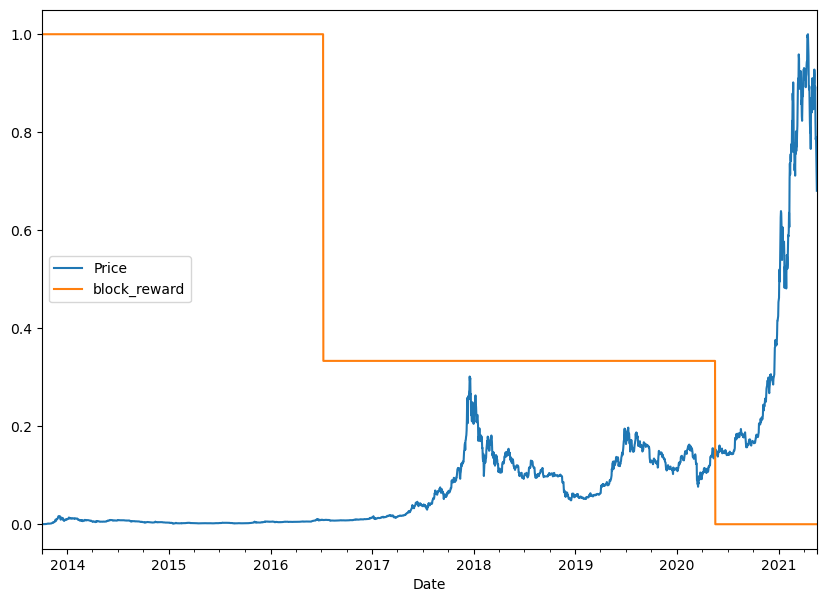

In [84]:
#plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                    columns=bitcoin_prices_block.columns,
                                    index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

In [85]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
    
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [86]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5)

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [87]:
y.head(5)

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [88]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [89]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_6")

model_6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(X_test, y_test),
           verbose=1,
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 541.0643  
Epoch 1: val_loss improved from inf to 1024.97412, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 2s 55ms/step - loss: 534.1320 - val_loss: 1024.9741
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 200.0445
Epoch 2: val_loss improved from 1024.97412 to 1007.08856, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 45ms/step - loss: 201.0266 - val_loss: 1007.0886
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 165.6573
Epoch 3: val_loss improved from 1007.08856 to 901.82245, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 73ms/step - loss: 164.0480 - val_loss: 901.8224
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 182.5137
Epoch 4: val_loss improved from 901.82245 to 792.75385, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 50ms/step - loss: 146.6798 - val_loss: 792.7538
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 145.7419
Epoch 5: val_loss improved from 792.75385 to 763.82263, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 49ms/step - loss: 140.5022 - val_loss: 763.8226
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 140.9108
Epoch 6: val_loss did not improve from 763.82263
18/18 [==============================] - 0s 8ms/step - loss: 140.0247 - val_loss: 842.2273
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 140.6681
Epoch 7: val_loss improved from 763.82263 to 737.65411, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 60ms/step - loss: 140.2326 - val_loss: 737.6541
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 138.4315
Epoch 8: val_loss did not improve from 737.65411
18/18 [==============================] - 0s 7ms/step - loss: 138.2713 - val_loss: 745.5212
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 140.7163
Epoch 9: val_loss improved from 737.65411 to 723.48822, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 140.3205 - val_loss: 723.4882
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 128.7203
Epoch 10: val_loss improved from 723.48822 to 698.68286, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 67ms/step - loss: 133.0320 - val_loss: 698.6829
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 129.9122
Epoch 11: val_loss did not improve from 698.68286
18/18 [==============================] - 0s 6ms/step - loss: 128.1119 - val_loss: 699.7906
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 126.6324
Epoch 12: val_loss did not improve from 698.68286
18/18 [==============================] - 0s 8ms/step - loss: 127.7113 - val_loss: 786.0935
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 131.9437
Epoch 13: val_loss did not improve from 698.68286
18/18 [==============================] - 0s 8ms/step - loss: 132.3343 - val_loss: 702.8399
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 125.9210
Epoch 14: val_loss improved from 698.68286 to 669.18024, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 47ms/step - loss: 126.8900 - val_loss: 669.1802
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 120.3426
Epoch 15: val_loss improved from 669.18024 to 660.78375, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 49ms/step - loss: 126.8847 - val_loss: 660.7838
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 122.6233
Epoch 16: val_loss did not improve from 660.78375
18/18 [==============================] - 0s 20ms/step - loss: 121.5145 - val_loss: 669.9028
Epoch 17/100
14/18 [======================>.......] - ETA: 0s - loss: 119.1090
Epoch 17: val_loss improved from 660.78375 to 656.78741, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 69ms/step - loss: 120.9032 - val_loss: 656.7874
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 122.3462
Epoch 18: val_loss did not improve from 656.78741
18/18 [==============================] - 0s 6ms/step - loss: 121.5177 - val_loss: 657.2365
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 84.0944
Epoch 19: val_loss did not improve from 656.78741
18/18 [==============================] - 0s 8ms/step - loss: 123.4779 - val_loss: 680.4831
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 142.2087
Epoch 20: val_loss improved from 656.78741 to 655.41614, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 47ms/step - loss: 121.5525 - val_loss: 655.4161
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9503
Epoch 21: val_loss improved from 655.41614 to 632.00336, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 67ms/step - loss: 121.7426 - val_loss: 632.0034
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 175.0412
Epoch 22: val_loss improved from 632.00336 to 627.15985, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 118.3775 - val_loss: 627.1599
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1663
Epoch 23: val_loss did not improve from 627.15985
18/18 [==============================] - 0s 6ms/step - loss: 118.3195 - val_loss: 630.1116
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2035
Epoch 24: val_loss improved from 627.15985 to 621.39862, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 63ms/step - loss: 118.2823 - val_loss: 621.3986
Epoch 25/100
 9/18 [==============>...............] - ETA: 0s - loss: 119.6029
Epoch 25: val_loss improved from 621.39862 to 617.62573, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 87ms/step - loss: 115.6438 - val_loss: 617.6257
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 114.2272
Epoch 26: val_loss improved from 617.62573 to 614.96661, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 56ms/step - loss: 115.3583 - val_loss: 614.9666
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 121.1459
Epoch 27: val_loss improved from 614.96661 to 612.12061, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 71ms/step - loss: 116.7821 - val_loss: 612.1206
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 112.9429
Epoch 28: val_loss improved from 612.12061 to 611.14709, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 53ms/step - loss: 113.5733 - val_loss: 611.1471
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 113.0811
Epoch 29: val_loss improved from 611.14709 to 606.22925, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 49ms/step - loss: 113.2586 - val_loss: 606.2292
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0199
Epoch 30: val_loss improved from 606.22925 to 603.63531, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 72ms/step - loss: 116.5889 - val_loss: 603.6353
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 114.7008
Epoch 31: val_loss did not improve from 603.63531
18/18 [==============================] - 0s 8ms/step - loss: 115.1891 - val_loss: 660.0206
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 115.9399
Epoch 32: val_loss improved from 603.63531 to 600.91486, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 46ms/step - loss: 115.9399 - val_loss: 600.9149
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 115.1786
Epoch 33: val_loss did not improve from 600.91486
18/18 [==============================] - 0s 6ms/step - loss: 113.1626 - val_loss: 607.2156
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 110.6850
Epoch 34: val_loss did not improve from 600.91486
18/18 [==============================] - 0s 8ms/step - loss: 111.5218 - val_loss: 632.9030
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 111.7728
Epoch 35: val_loss improved from 600.91486 to 599.91754, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 45ms/step - loss: 111.7728 - val_loss: 599.9175
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 119.6054
Epoch 36: val_loss improved from 599.91754 to 594.99634, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 68ms/step - loss: 119.1347 - val_loss: 594.9963
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 134.8157
Epoch 37: val_loss did not improve from 594.99634
18/18 [==============================] - 0s 6ms/step - loss: 114.1189 - val_loss: 603.0693
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 112.9126
Epoch 38: val_loss did not improve from 594.99634
18/18 [==============================] - 0s 7ms/step - loss: 112.4210 - val_loss: 597.8620
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 111.4624
Epoch 39: val_loss improved from 594.99634 to 587.41168, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 39ms/step - loss: 111.4624 - val_loss: 587.4117
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 111.0774
Epoch 40: val_loss did not improve from 587.41168
18/18 [==============================] - 0s 7ms/step - loss: 109.5445 - val_loss: 589.6351
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 116.8432
Epoch 41: val_loss did not improve from 587.41168
18/18 [==============================] - 0s 6ms/step - loss: 116.8432 - val_loss: 749.8098
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 126.3572
Epoch 42: val_loss did not improve from 587.41168
18/18 [==============================] - 0s 8ms/step - loss: 125.1079 - val_loss: 621.9464
Epoch 43/100
14/18 [======================>.......] - ETA: 0s - loss: 105.4639
Epoch 43: val_loss did not improve from 587.41168
18/18 [==============================] - 0s 14ms/step - loss: 109.1144 - val_loss: 590.4214
Epoch 44/100
13/18 [=======

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 109.7786 - val_loss: 582.0850
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 84.4411
Epoch 45: val_loss did not improve from 582.08502
18/18 [==============================] - 0s 4ms/step - loss: 108.3038 - val_loss: 585.3259
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 82.4967
Epoch 46: val_loss did not improve from 582.08502
18/18 [==============================] - 0s 5ms/step - loss: 109.5615 - val_loss: 587.4584
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 99.8579
Epoch 47: val_loss did not improve from 582.08502
18/18 [==============================] - 0s 5ms/step - loss: 112.7004 - val_loss: 652.6875
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 107.8942
Epoch 48: val_loss did not improve from 582.08502
18/18 [==============================] - 0s 5ms/step - loss: 108.9913 - val_loss: 585.5203
Epoch 49/100
 1/18 [>..........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 110.2302 - val_loss: 578.8245
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7588
Epoch 50: val_loss did not improve from 578.82446
18/18 [==============================] - 0s 5ms/step - loss: 111.5285 - val_loss: 633.6331
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 94.4034
Epoch 51: val_loss did not improve from 578.82446
18/18 [==============================] - 0s 5ms/step - loss: 109.3750 - val_loss: 599.3960
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3931
Epoch 52: val_loss did not improve from 578.82446
18/18 [==============================] - 0s 5ms/step - loss: 110.6890 - val_loss: 593.2888
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 64.3203
Epoch 53: val_loss did not improve from 578.82446
18/18 [==============================] - 0s 5ms/step - loss: 111.1313 - val_loss: 611.2954
Epoch 54/100
 1/18 [>.........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 63ms/step - loss: 109.6124 - val_loss: 574.1502
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 103.1794
Epoch 56: val_loss did not improve from 574.15021
18/18 [==============================] - 0s 6ms/step - loss: 107.2787 - val_loss: 796.7115
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 115.0051
Epoch 57: val_loss did not improve from 574.15021
18/18 [==============================] - 0s 5ms/step - loss: 126.2781 - val_loss: 777.2737
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 103.7222
Epoch 58: val_loss did not improve from 574.15021
18/18 [==============================] - 0s 6ms/step - loss: 121.5914 - val_loss: 696.2361
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 82.3272
Epoch 59: val_loss did not improve from 574.15021
18/18 [==============================] - 0s 6ms/step - loss: 110.1933 - val_loss: 583.0614
Epoch 60/100
 1/18 [>........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 67ms/step - loss: 107.5919 - val_loss: 567.7752
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 115.6048
Epoch 66: val_loss improved from 567.77521 to 567.06616, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 106.5835 - val_loss: 567.0662
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 89.0878
Epoch 67: val_loss did not improve from 567.06616
18/18 [==============================] - 0s 5ms/step - loss: 106.1983 - val_loss: 637.2988
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 69.2349
Epoch 68: val_loss did not improve from 567.06616
18/18 [==============================] - 0s 5ms/step - loss: 116.6412 - val_loss: 714.8325
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6431
Epoch 69: val_loss did not improve from 567.06616
18/18 [==============================] - 0s 6ms/step - loss: 123.3964 - val_loss: 627.9918
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 118.0609
Epoch 70: val_loss did not improve from 567.06616
18/18 [==============================] - 0s 5ms/step - loss: 125.3887 - val_loss: 602.8726
Epoch 71/100
 1/18 [>.........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 55ms/step - loss: 105.9040 - val_loss: 566.1102
Epoch 75/100
13/18 [====================>.........] - ETA: 0s - loss: 105.7246
Epoch 75: val_loss did not improve from 566.11023
18/18 [==============================] - 0s 8ms/step - loss: 106.6549 - val_loss: 576.0652
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 108.9233
Epoch 76: val_loss did not improve from 566.11023
18/18 [==============================] - 0s 6ms/step - loss: 108.9233 - val_loss: 580.1398
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 82.0216
Epoch 77: val_loss did not improve from 566.11023
18/18 [==============================] - 0s 11ms/step - loss: 106.0918 - val_loss: 582.1032
Epoch 78/100
12/18 [===================>..........] - ETA: 0s - loss: 105.4469
Epoch 78: val_loss did not improve from 566.11023
18/18 [==============================] - 0s 14ms/step - loss: 107.8038 - val_loss: 576.0116
Epoch 79/100
12/18 [=======

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 37ms/step - loss: 105.8424 - val_loss: 565.6520
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 120.5439
Epoch 90: val_loss did not improve from 565.65198
18/18 [==============================] - 0s 5ms/step - loss: 105.0479 - val_loss: 598.6002
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 92.2241
Epoch 91: val_loss did not improve from 565.65198
18/18 [==============================] - 0s 4ms/step - loss: 109.9977 - val_loss: 648.2945
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 97.8570
Epoch 92: val_loss did not improve from 565.65198
18/18 [==============================] - 0s 5ms/step - loss: 107.0808 - val_loss: 632.7806
Epoch 93/100
 1/18 [>.............................] - ETA: 0s - loss: 112.7102
Epoch 93: val_loss did not improve from 565.65198
18/18 [==============================] - 0s 5ms/step - loss: 113.6987 - val_loss: 609.4144
Epoch 94/100
 1/18 [>.........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 64ms/step - loss: 107.5205 - val_loss: 564.1709
Epoch 100/100
 1/18 [>.............................] - ETA: 0s - loss: 117.8821
Epoch 100: val_loss did not improve from 564.17090
18/18 [==============================] - 0s 5ms/step - loss: 107.8866 - val_loss: 599.9237


In [90]:
model_6 = tf.keras.models.load_model("model_experiemnts/model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 564.1710


564.1709594726562

In [91]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8822.747, 8762.616, 9003.958, 8744.733, 8745.329], dtype=float32)>

In [92]:
model_6_results = evaluation_preds(y_true=tf.squeeze(y_test),
                                  y_pred=model_6_preds)
model_6_results

{'mae': 564.17084,
 'mse': 1158112.5,
 'mase': 0.9910919,
 'rmse': 1076.1564,
 'mape': 2.5362592}

In [93]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mase': 0.99957,
 'rmse': 1071.2362,
 'mape': 2.5165248}

## Model 7: N-BEATS algorithm

### Building and testing the N-BEATS block layer

In [94]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, 
                input_size:int, 
                theta_size:int,
                horizon:int,
                n_neurons:int,
                n_layers:int,
                **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        #Block contains stack of 4 fully connected layesrs each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
            
        theta = self.theta_layer(x)
        
        #Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [95]:
tf.random.set_seed(42)
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE+HORIZON,
                                      horizon=HORIZON,
                                      n_neurons=128,
                                      n_layers=4)

In [96]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [97]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(), forecast.numpy()

(array([[-0.01383571, -0.5596922 , -0.4033074 ,  0.25038442,  0.46056888,
          0.4051112 ,  0.22810113]], dtype=float32),
 array([[0.31506366]], dtype=float32))

### Preparing data fro the N-BEATS algorithm using tf.data

In [98]:
HORIZON = 1
WINDOW_SIZE = 7

In [99]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [100]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [101]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [102]:
# Make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [103]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

In [105]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10) 

subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])
added = tf.keras.layers.add([tensor_1, tensor_2])
subtracted.numpy(), added.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]))